# Develop the RPT styled period estimation

In [2]:
# Python methods and libraries 
import numpy as np
import matplotlib.pyplot as plt

# User defined methods and libraries
from utils import *
from mab import MultiArmedBandit

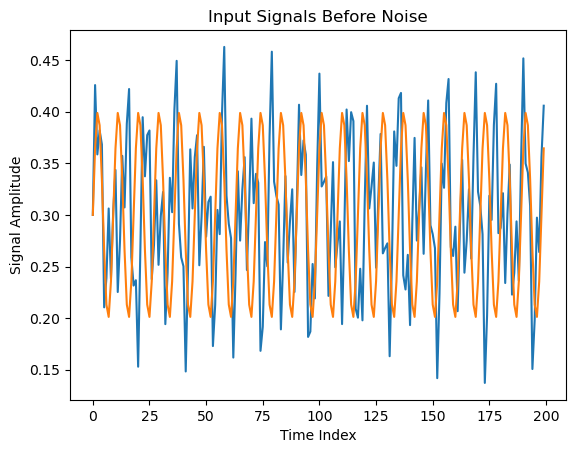

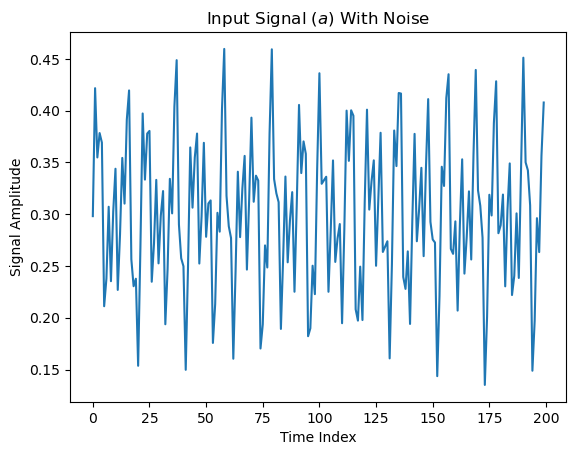

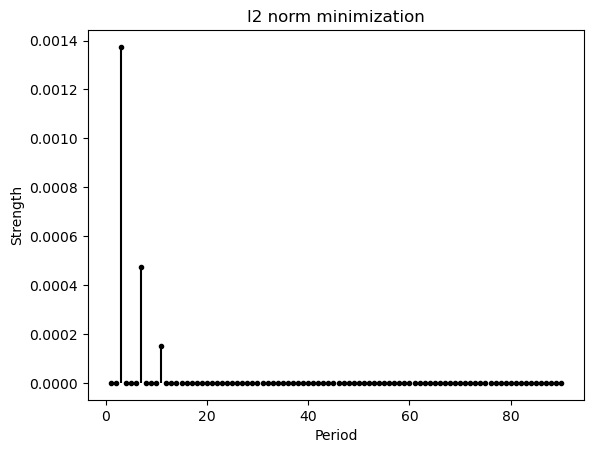

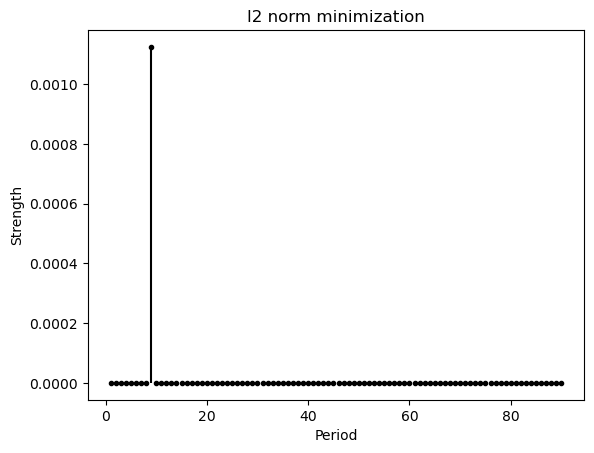

In [3]:
#Stage 1: Period / support estimation

K = 2 #number of arms
n = 20 # number of samples per arm to estimate period
Pmax = 90  # The largest period spanned by the NPDs
Dictionary_type = 'Ramanujan'  # Type of the dictionary

# Step 1: Selection of Input Signal Parameters

Input_Datalength = 200  # Data length of the input signal
T= 10*Input_Datalength
SNR_dB = 30 # Signal-to-noise ratio of the input in dB
long_seq_true = np.zeros((K,T))
const = 0.3

Input_Periods = [7, 11, 3]  # Component Periods of the input signal
a = generate_periodic_signal(Input_Periods, Input_Datalength, c = 2) + const
long_seq_true[0,:] = generate_periodic_signal(Input_Periods, T, c = 2)
lcm_signal_1 = lcm_of_list(Input_Periods)


Input_Periods = [9]  # Component Periods of the input signal
b = generate_periodic_signal(Input_Periods, Input_Datalength, c= 2) + const
long_seq_true[1,:] = generate_periodic_signal(Input_Periods, T, c= 2)
lcm_signal_2 = lcm_of_list(Input_Periods)

plt.figure()
plt.plot(a)
plt.plot(b)
plt.title('Input Signals Before Noise')
plt.xlabel('Time Index')
plt.ylabel('Signal Amplitude')

# Step 3: Adding Noise to the Input

a = add_noise(a, Input_Datalength, SNR_dB)
b = add_noise(b, Input_Datalength, SNR_dB)
plt.figure()
plt.plot(a)
#plt.plot(b)
plt.title('Input Signal $(a)$ With Noise')
plt.xlabel('Time Index')
plt.ylabel('Signal Amplitude')

long_seq_noise = np.zeros((K,T))
long_seq_noise[0,:] = add_noise(long_seq_true[0,:], T, SNR_dB)
long_seq_noise[1,:] = add_noise(long_seq_true[1,:], T, SNR_dB)


# Step 4: Producing Strength vs Period Plots using NPDs
energy_a, support_a = strength_vs_period_L2(a, Pmax, Dictionary_type)  
energy_b, support_b = strength_vs_period_L2(b, Pmax, Dictionary_type)  

# Using DFT to estimate period

/var/folders/86/sjzlj84x4m75pb46b96gznjn0v67yf/T/ipykernel_73604/2888815339.py:9: RuntimeWarning: divide by zero encountered in divide
  plt.stem(1/positive_frequencies, np.abs(positive_dft), linefmt='k-', basefmt=" ", markerfmt="k.")


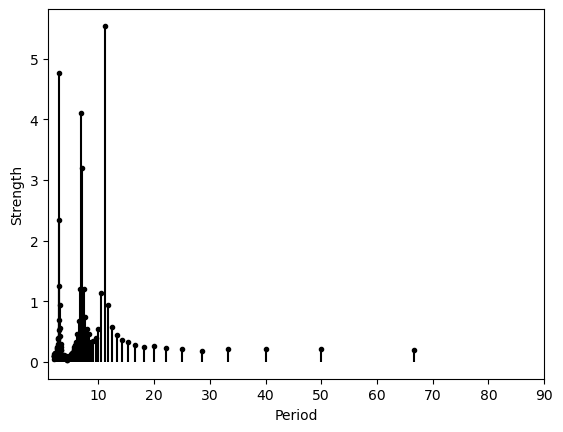

In [5]:
dft = np.fft.fft(a)

# Compute the corresponding frequencies
frequencies = np.fft.fftfreq(len(dft), d=1)
positive_frequencies = frequencies[:len(frequencies)//2]
positive_dft = dft[:len(frequencies)//2]
# Plot the DFT spectrum
plt.figure()
plt.stem(1/positive_frequencies, np.abs(positive_dft), linefmt='k-', basefmt=" ", markerfmt="k.")
#plt.title('Discrete Fourier Transform (DFT) Spectrum')
plt.xlabel('Period')
plt.ylabel('Strength')
plt.xlim([1, Pmax])
plt.show()

In [6]:
# Create dictionary
A = create_dictionary(Pmax, T, Dictionary_type)

In [7]:
sims = 1 # number of trials for bts
average_regret_bts, min_regret_bts, max_regret_bts = bts(sims, Pmax, A, K, T, const, SNR_dB)

Simulation number: 0


In [22]:
total_effective_arms = lcm_signal_1 + lcm_signal_2
x1 = generate_periodic_signal(Input_Periods, lcm_signal_1, c= 2) + const
x2 = generate_periodic_signal(Input_Periods, lcm_signal_2, c= 2)+const
means = np.concatenate((x1, x2))
# Run MAB-UCB
periods = [lcm_signal_1, lcm_signal_2]
mab = MultiArmedBandit(len(means), 1, SNR_dB, periods)
mab.set_setup(mode='preset', preset_mean=means)
average_regret, time_values, min_regret, max_regret = mab.run(runs = sims, duration = 100*T)

Running Loop  0


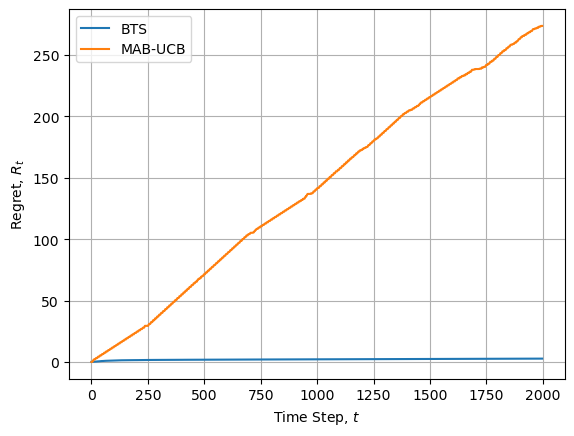

In [24]:
# Plotting regret
plt.figure()
plt.plot(average_regret_bts, label = 'BTS')
plt.fill_between(time_values[:len(average_regret_bts)], min_regret_bts[:len(average_regret_bts)], max_regret_bts[:len(average_regret_bts)], alpha=0.3)

plt.plot(average_regret[:len(average_regret_bts)], label = 'MAB-UCB')
plt.fill_between(time_values[:len(average_regret_bts)], min_regret[:len(average_regret_bts)], max_regret[:len(average_regret_bts)], alpha=0.3)
plt.legend()
plt.xlabel("Time Step, $t$")
plt.ylabel("Regret, $R_t$")
plt.grid(True)
plt.show()


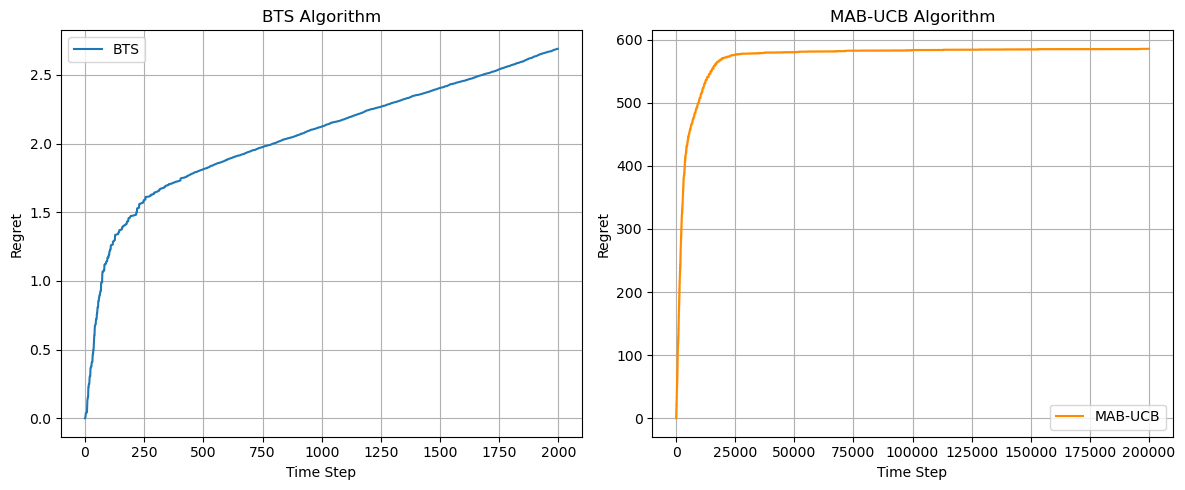

In [26]:
# Create figure and axes
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot for BTS algorithm
axs[0].plot(average_regret_bts, label='BTS')
axs[0].fill_between(time_values[:len(average_regret_bts)], min_regret_bts[:len(average_regret_bts)], max_regret_bts[:len(average_regret_bts)], alpha=0.3)
axs[0].legend(loc='upper left')
axs[0].set_xlabel("Time Step")
axs[0].set_ylabel("Regret")
axs[0].set_title("BTS Algorithm")
axs[0].grid(True)

# Plot for MAB-UCB algorithm
axs[1].plot(average_regret, color='darkorange', label='MAB-UCB')
axs[1].fill_between(time_values, min_regret, max_regret, alpha=0.3, color='darkorange')
axs[1].legend()
axs[1].set_xlabel("Time Step")
axs[1].set_ylabel("Regret")
axs[1].set_title("MAB-UCB Algorithm")
axs[1].grid(True)

# Show plot
plt.tight_layout()